In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:

from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
#read the dataset
data = pd.read_csv("50_Startups.csv")

In [ ]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
#droping the unecessary features
startups1=data.drop(columns=['State'],axis=1)

In [ ]:
startups1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
dataset=startups1.rename({'Marketing Spend':'Marketing_Spend','R&D Spend':'RD_Spend'},axis=1)
dataset.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


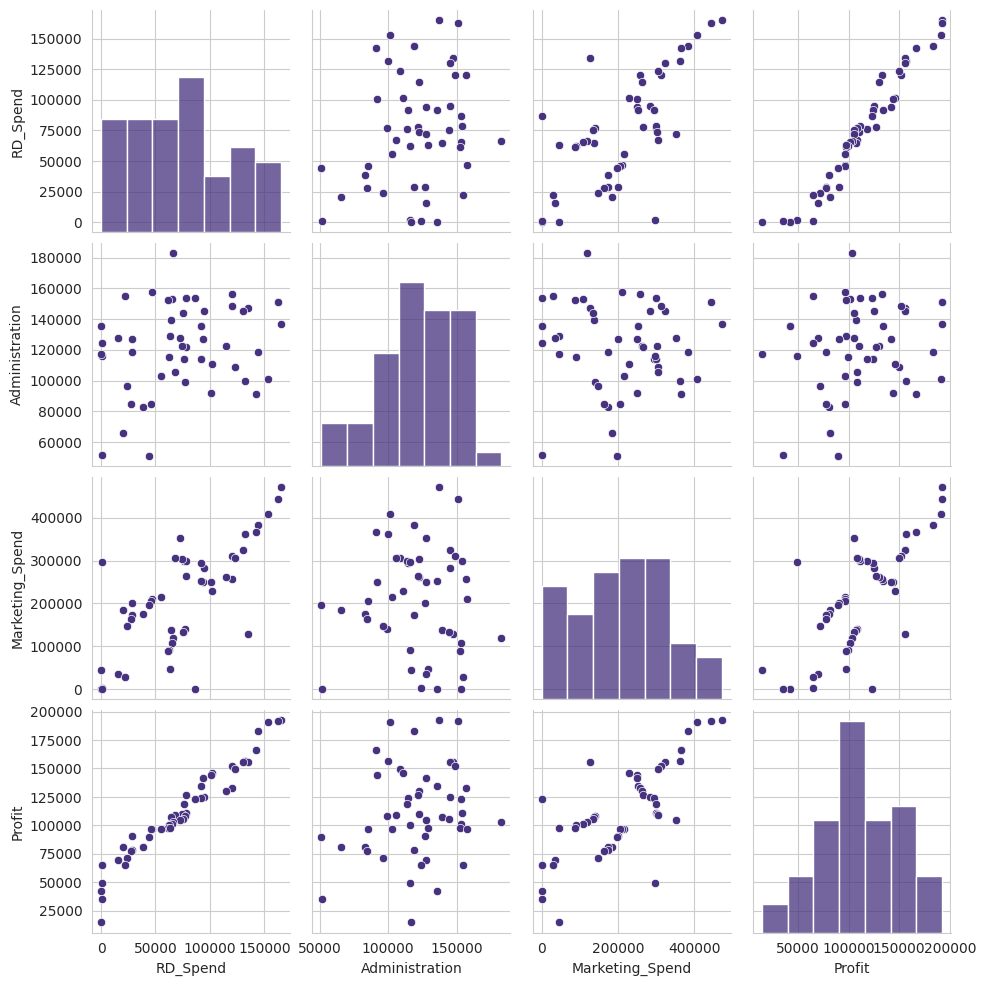

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_palette('viridis')

sns.set_style(style='whitegrid')
sns.pairplot(dataset)

<Axes: >

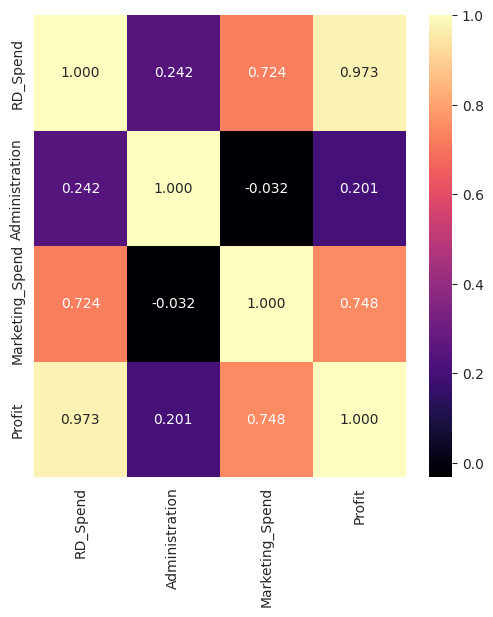

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(dataset.corr(), cmap='magma', annot=True, fmt=".3f")
 #Heatmap fmt=".no. of decimals"

Check whether outliers are present

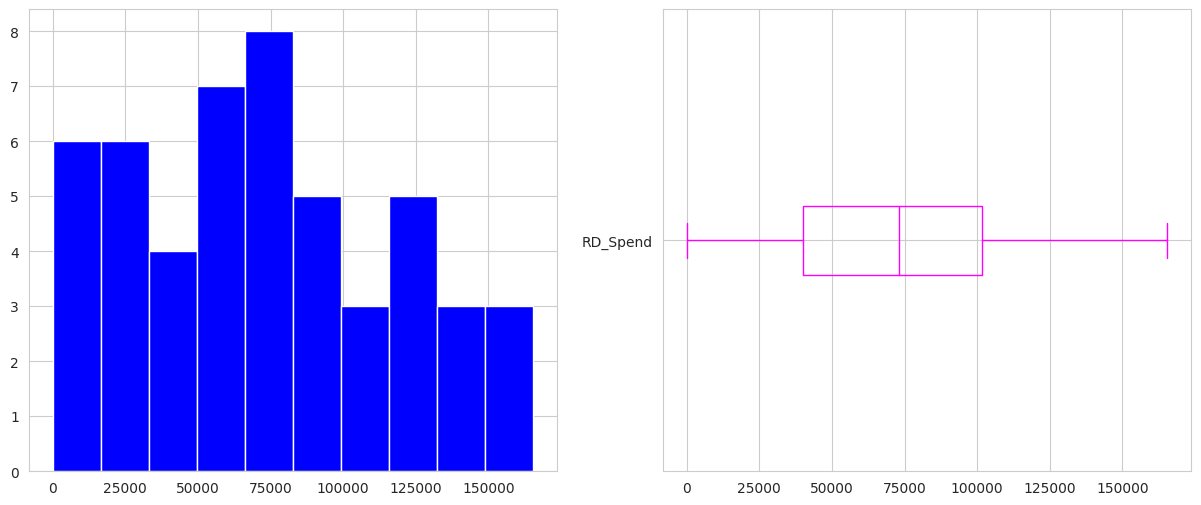

In [ ]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
dataset['RD_Spend'].hist(color='blue')
plt.subplot(1,2,2)
dataset.boxplot(column=['RD_Spend'],vert=False,color='magenta',patch_artist=False)

plt.show()

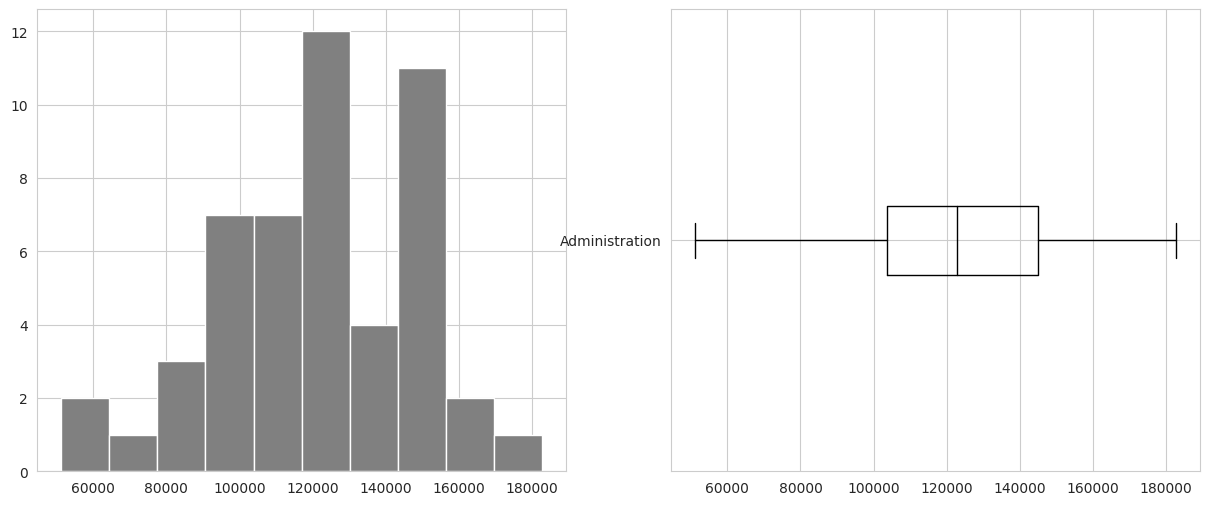

In [ ]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
dataset['Administration'].hist(color='grey')
plt.subplot(1,2,2)
dataset.boxplot(column=['Administration'],color='black',patch_artist=False,vert=False)

plt.show()

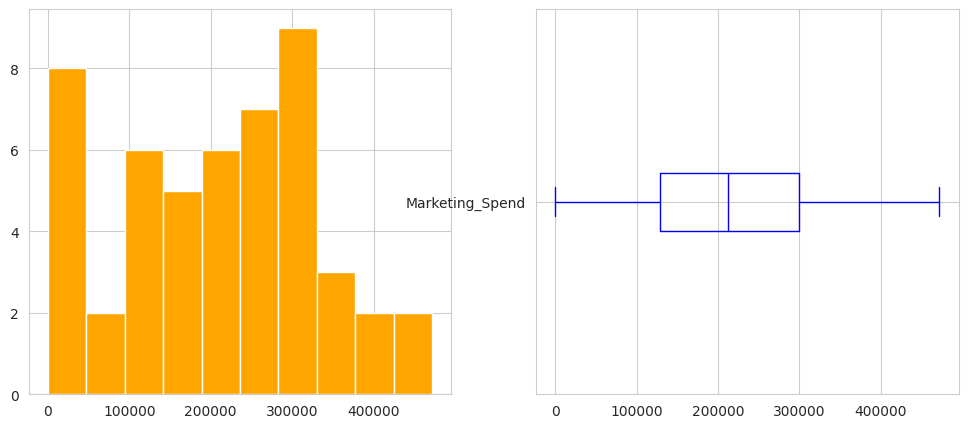

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
dataset['Marketing_Spend'].hist(color='orange')
plt.subplot(1,2,2)
dataset.boxplot(column=['Marketing_Spend'],color='blue',patch_artist=False,vert=False)
plt.show()

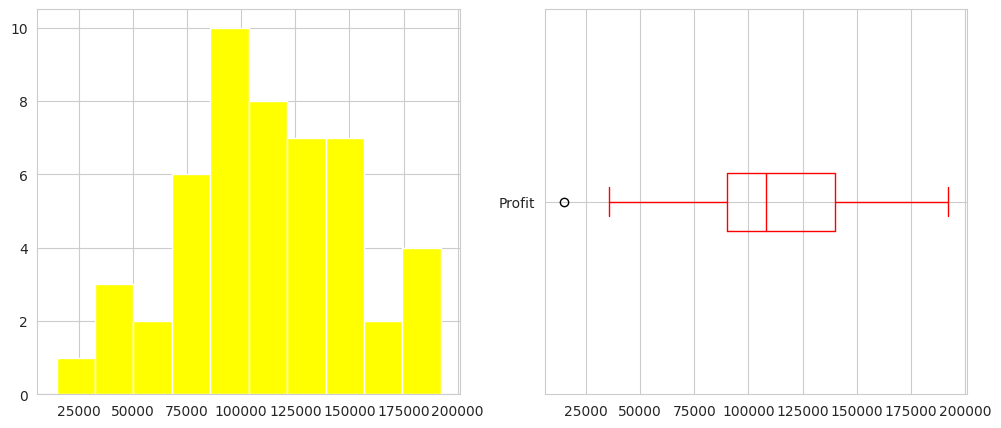

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
dataset['Profit'].hist(color='yellow')
plt.subplot(1,2,2)
dataset.boxplot(column=['Profit'],color='red',patch_artist=False,vert=False)
plt.show()

Model1- Creating a model to predict profit with better accuracy and low error, without using any transformation

In [ ]:
#Build model
import statsmodels.formula.api as smf
model1 = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=dataset).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        18:03:24   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Coefficients
model1.params

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [ ]:
#print t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept           7.626218
RD_Spend           17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
RD_Spend           2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [ ]:
#R squared values and adjusted rsquared value
(model1.rsquared,model1.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

Prediction

In [ ]:
startup_new=pd.DataFrame({"RD_Spend":152200,"Administration":155300,"Marketing_Spend":472000},index=[1])
model1.predict(startup_new)
print("The profit will be:",model1.predict(startup_new))

The profit will be: 1    181439.150281
dtype: float64


Test for Normality of Residuals (Q-Q Plot)

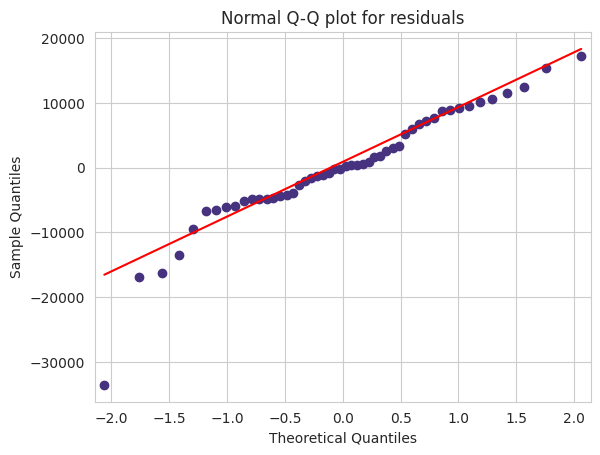

In [ ]:
sm.qqplot(model1.resid,line='q')
plt.title('Normal Q-Q plot for residuals')
plt.show()

In [ ]:
list(np.where(model1.resid<-20000))

[array([49])]

Residual Plot for Homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

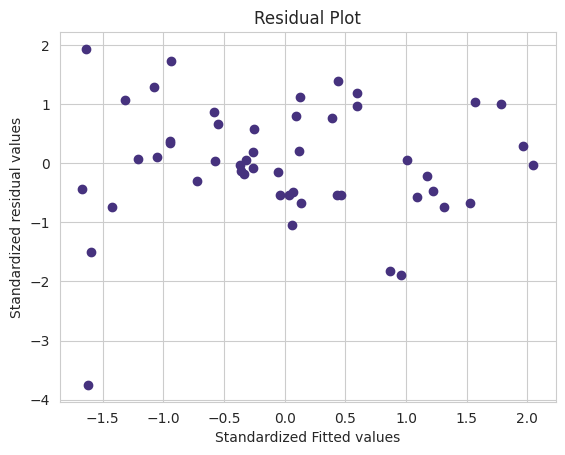

In [ ]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Detecting influencers/outliers- By Cook's distance and influence plot

In [ ]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

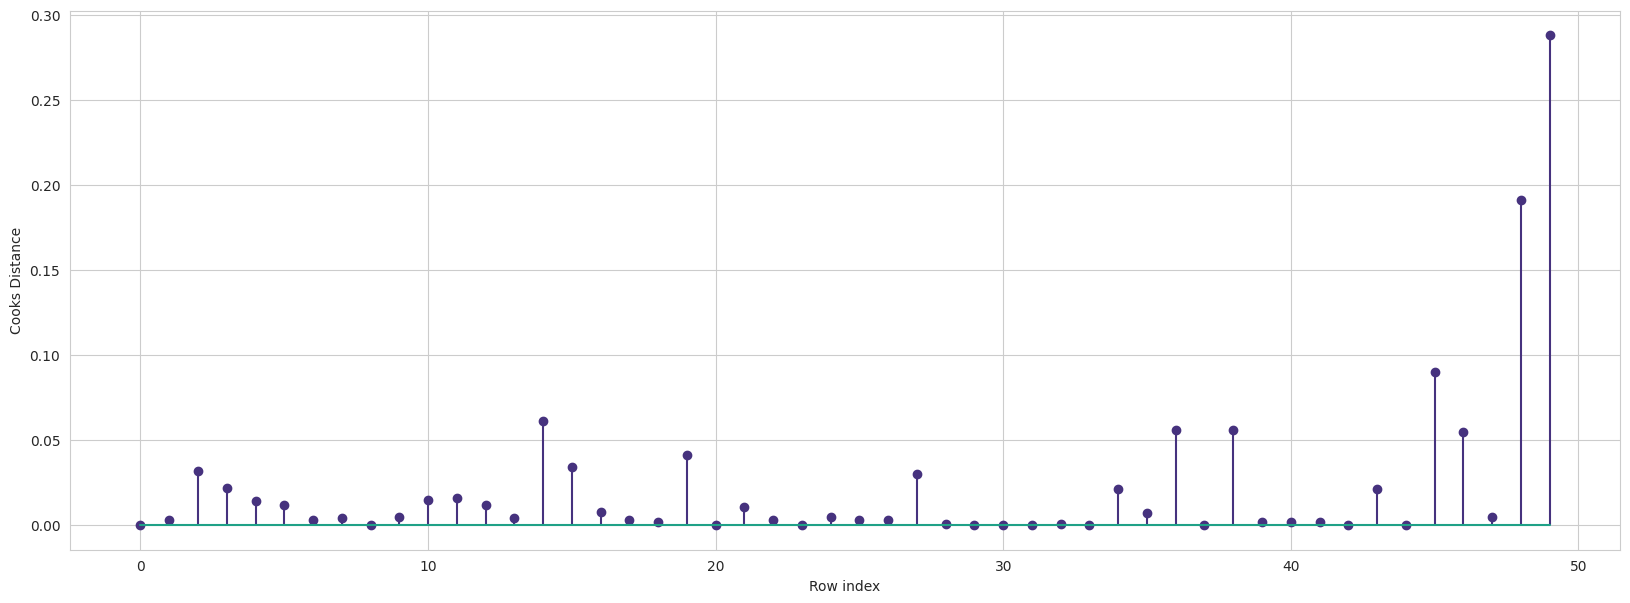

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dataset)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of outliers
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

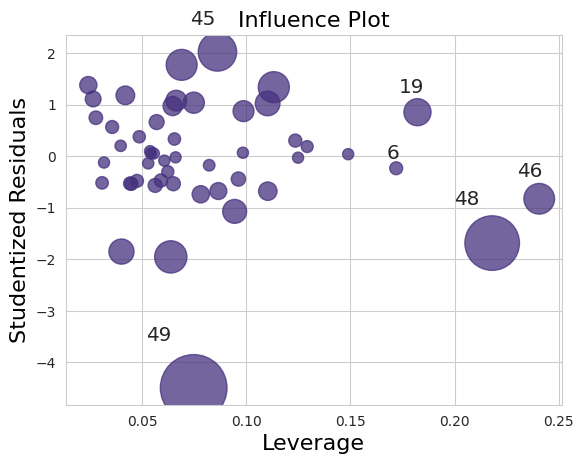

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [ ]:
k = dataset.shape[1]
n = dataset.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

From the visualization it is evident that at the index of 49 which is highly influenced so we are droping the data from our dataset

In [ ]:
dataset[dataset.index.isin([49])]

,RD_Spend,Administration,Marketing_Spend,Profit
49,0.0,116983.8,45173.06,14681.4


In [ ]:
startups3=dataset.drop(dataset.index[[49]],axis=0).reset_index()

In [ ]:
startups3.head()

,index,RD_Spend,Administration,Marketing_Spend,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94


Model2-Predicting a new model(with outlier removed dataset)

In [ ]:
#Coefficent
model2 = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend', data = startups3).fit()
model2.params

Intercept          52382.439251
RD_Spend               0.783002
Administration        -0.022201
Marketing_Spend        0.025234
dtype: float64

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           8.85e-32
Time:                        18:15:41   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD_Spend            0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Coefficients
model2.params

Intercept          52382.439251
RD_Spend               0.783002
Administration        -0.022201
Marketing_Spend        0.025234
dtype: float64

In [ ]:
# checking the t and p-Values
print(model2.tvalues, '\n', model2.pvalues)

Intercept           9.450782
RD_Spend           20.469501
Administration     -0.517889
Marketing_Spend     1.825383
dtype: float64 
 Intercept          2.960000e-12
RD_Spend           1.971077e-24
Administration     6.070728e-01
Marketing_Spend    7.458443e-02
dtype: float64


In [ ]:
# Rsquared and adjusted rsquared value
(model2.rsquared,model2.rsquared_adj)

(0.9613162435129847, 0.9587373264138503)

Conclusion:From all the observations and calculations it is evident that Model2 is the best model to predict profit with a better accuracy, since it has the highest rsquared value and lowest rmse value.